# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [120]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [121]:
df=pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

**b.** Use the cell below to find the number of rows in the dataset.

In [122]:
df.count()
#number of rows is 294478

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

**c.** The number of unique users in the dataset.

In [123]:
len(df['user_id'].unique())
#number of unique rows

290584

**d.** The proportion of users converted.

In [124]:
df['converted'].mean()

0.11965919355605512

In [125]:
df.head()
# did this again to be able to see the data and work on it

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [126]:
#some new page is not treatment and vice versa so we need to find both
treatment_not_new_page=df.query('group== "treatment" and landing_page!="new_page"')
newpage_not_treatment = df.query('group != "treatment" & landing_page == "new_page"')
len(treatment_not_new_page)+len(newpage_not_treatment)
#this data may be an error during my analysis because it show the ttt gp having old pages which is not the data we need

3893

**f.** Do any of the rows have missing values?

In [127]:
df.info()
#it apeears form Data there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [128]:
treatment_not_new_page.head()

#this is the inacurate data

user_id                   timestamp      group landing_page  converted
308   857184  2017-01-20 07:34:59.832626  treatment     old_page          0
327   686623  2017-01-09 14:26:40.734775  treatment     old_page          0
357   856078  2017-01-12 12:29:30.354835  treatment     old_page          0
685   666385  2017-01-23 08:11:54.823806  treatment     old_page          0
713   748761  2017-01-10 15:47:44.445196  treatment     old_page          0

In [129]:

newpage_not_treatment.head()
#this is also inacurate data
#we need to drop both of them

user_id                   timestamp    group landing_page  converted
22    767017  2017-01-12 22:58:14.991443  control     new_page          0
240   733976  2017-01-11 15:11:16.407599  control     new_page          0
490   808613  2017-01-10 21:44:01.292755  control     new_page          0
846   637639  2017-01-11 23:09:52.682329  control     new_page          1
850   793580  2017-01-08 03:25:33.723712  control     new_page          1

In [130]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

df1 = df.drop(df[(df.group =="treatment") & (df.landing_page != "new_page")].index)

df2 = df1.drop(df1[(df.group =="control") & (df1.landing_page != "old_page")].index)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [131]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [132]:
df2['user_id'].count()

290585

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [133]:
duplicated= df2[df2['user_id'].duplicated()]
duplicated

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

**c.** Display the rows for the duplicate **user_id**? 

In [134]:
duplicated

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [135]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(labels=2893, inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
#when I run duplicated pararmeters again it show me no duplicate this prove that the row is deleted

In [136]:
df2.info()
#to verify the number of rows decreased by one

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [137]:
df2.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [138]:
converstionrate=df2['converted'].mean()
converstionrate

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [139]:
conversionratecontrol = df2[df2['group'] == 'control']['converted'].mean()
conversionratecontrol
#oldpageconversionmean

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [140]:
conversionratetreatmeant=df2[df2['group'] == 'treatment']['converted'].mean()
conversionratetreatmeant
#newpageconversionmean

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [141]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=conversionratecontrol-conversionratetreatmeant
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [142]:
df2.shape[0]

290584

In [143]:
#probability of an individual received the new page
probability = df2[df2['landing_page'] == 'new_page'].count()[0] / df2.shape[0]
probability

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

NO, because the differnce in the conversion rate from old to new and vice verse is not significant, also people recieving new page is about 50 which also show no difference 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

Null hypothesis(H0): the conversion rate of the old_page is greater or the same as the conversion rate of the newpage.(Pold>=Pnew)

Alternative hypothesis(H1): the conversion rate of the old_page is less than the conversion rate of the newpage.(Pold<Pnew)

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [144]:
df2.head()
#here we retrieve data again to make the needed intervension

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [145]:
df3=df2.drop(df2.columns[[0, 1]], axis=1)
df3.head()
#we removed unwanted columns so we can work much faster in our datasets

group landing_page  converted
0    control     old_page          0
1    control     old_page          0
2  treatment     new_page          0
3  treatment     new_page          0
4    control     old_page          1

In [146]:
Pnew=df3['converted'].mean()
Pnew
#converstion rate for the new website

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [147]:
Pold=df3['converted'].mean()
Pold
#converstion rate for the old website
#both of values are equal because we assumed so

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [148]:
Nnew=len(df3.query('landing_page == "new_page"'))
Nnew
# the number of individuals in the treatment group

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [149]:
Nold=len(df3.query('landing_page != "new_page"'))
Nold
#the number of individuals in the control group

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [150]:
# Simulate a Sample for the treatment Group

new_page_converted = np.random.choice([1, 0], size=Nnew, p=[Pnew, (1-Pnew)])
new_page_converted.mean()

0.11840203702429289

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [151]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1, 0], size=Nold, p=[Pold, (1-Pold)])
old_page_converted.mean()

0.12065476272423145

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [152]:
new_page_converted.mean()-old_page_converted.mean()

-0.0022527256999385625


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [153]:
# Sampling distribution 
p_diffs = []
#difference in conversion rate
for _ in range(10000):
    new_page_converted = np.random.binomial(1,Pnew,Nnew).mean()
    old_page_converted = np.random.binomial(1,Pold,Nold).mean()
    p_diffs.append(new_page_converted - old_page_converted)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

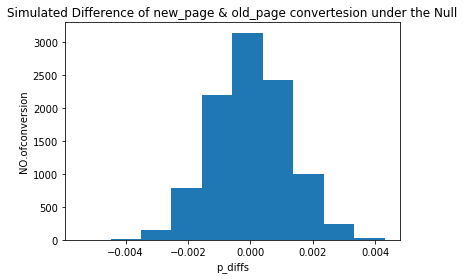

In [154]:
#converting numpy to array
p_diffs = np.array(p_diffs)

#plot histogram
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('NO.ofconversion')
plt.title('Simulated Difference of new_page & old_page convertesion under the Null');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [155]:
df_control = df3.query('group == "control"')
df_treatment = df3.query('group == "treatment"')

# display observed difference
obs_diff = df_treatment.converted.mean() - df_control.converted.mean()
obs_diff

-0.0015782389853555567

In [156]:
p=(p_diffs>obs_diff).mean()
p
#p-value

0.90780000000000005

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

this value is called p-value which show us if we can reject the null or no if it is lower than the threshold(0.05) we should reject the null.
in our example it appear to be high(higher than our threshold(5%) so till now with the given amount of data we actually we cannot reject null theory and we don t need to change to the alternative hypothesis(the new page) 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [157]:
import statsmodels.api as sm
# number of conversions with the old_page
convert_old = len(df3.query('landing_page == "old_page" & converted == 1'))

# number of conversions with the new_page
convert_new = len(df3.query('landing_page == "new_page" & converted == 1'))

# number of individuals who were shown the old_page
n_old = len(df3.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df3.query('landing_page == "new_page"'))

In [158]:
convert_old

17489

In [159]:
convert_new

17264

In [160]:
n_old

145274

In [161]:
n_new

145310

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [162]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value
#testing propotions based on z test 
#we made (alternative=smaller) because in our alternative hypothesis we need less conversion rate in old page to see if we can accept the alternative hypothesis

(1.3109241984234394, 0.90505831275902449)

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

The z-score and p - value calculated confirm what we said before about P value above that we cannot reject our H0(old page)The p_value is 0.905 and is higher than our threshold.(0.05)


<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

logestic regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [163]:
import statsmodels.formula.api as smf

In [164]:
df2.head()
#we retrieve our data to make manipulation

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [165]:
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df4 = df2.drop(df2[df2['group'] == 'control'].index, axis=0)
df4.head()
#here we can see that our Treatment(intercept) all contain 1 value

user_id                   timestamp      group landing_page  converted  \
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1   
8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1   
9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1   

   control  treatment  
2        0          1  
3        0          1  
6        0          1  
8        0          1  
9        0          1

In [166]:
df5 = df2.rename(columns={'treatment': 'ab_page'})
df5.head()
#here we returned all people and changed intercept into ab_page

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   control  ab_page  
0        1        0  
1        1        0  
2        0        1  
3        0        1  
4        1        0

In [167]:
df6=df5.drop(df5.columns[5], axis=1)
df6.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   ab_page  
0        0  
1        0  
2        1  
3        1  
4        0

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [168]:
from scipy import stats
model1 = smf.logit(formula='converted ~ ab_page', data=df6).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [169]:
model1.summary2()
#here we show the relation between converted and ab_page while holding the other variable constant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-16 22:43 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


the p value here is 0.1899 which is still higher than our threshold(0.05) while in part 2 it was about 0.9.....
The p-value is very different. This might be because the tests of the regression model assumes an interception and may be there is a difference  in one or two-tailed test causing this to occeur, also this may be that other factors affecting the results not mentioned in regression model
in both cases, the results do not support the alternative hypothesis sufficiently.



**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

the reason why other factors is good to consider is because other potencial influences may affect the conversion rate.
which in return will improve our new pages 
the disadvantge of that the model will be difficult to analyze

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [170]:
#joining country table
countries = pd.read_csv('./countries.csv')
countries.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

In [171]:
df_merged = countries.set_index('user_id').join(df6.set_index('user_id'))
df_merged.head()
#merging tables

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  ab_page  
user_id                      
834778           0        0  
928468           0        1  
822059           1        1  
711597           0        0  
710616           0        1

In [172]:
#showing unique countries to create dummy variables
df_merged.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [173]:
#fit the model and summurize the results
model2 = smf.logit(formula='converted ~ C(country) ', data=df_merged).fit()
model2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-16 22:43 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -2.0375   0.0260 -78.3639 0.0000 -2.0885 -1.9866
C(country)[T.UK]   0.0507   0.0284   1.7863 0.0740 -0.0049  0.1064
C(country)[T.US]   0.0408   0.0269   1.5178 0.1291 -0.0119  0.0935
==================================================================

"""

as you can see the countries does not influence the conversion rate because the P value is still above the threshold(0.05)
i will make another way to solve this below

In [174]:
#another solution 
# first we Create the necessary dummy variables
df_merged[['CA','UK', 'US']]= pd.get_dummies(df_merged['country'])
df_merged.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  ab_page  CA  UK  US  
user_id                                  
834778           0        0   0   1   0  
928468           0        1   0   0   1  
822059           1        1   0   1   0  
711597           0        0   0   1   0  
710616           0        1   0   1   0

In [175]:
#  then we Fit our model, and summarize the results
model3 = smf.logit(formula='converted ~ UK + US ', data=df_merged).fit()
model3.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-16 22:43 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

 this confirm that the conversion rate because the P value is still above the threshold(0.05) so the countries does not influence p value

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [176]:
#let us create new dummy value to show countries in columns
df_merged[['US','CA', 'UK']]= pd.get_dummies(df_merged['country'])
df_merged.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  ab_page  CA  UK  US  
user_id                                  
834778           0        0   1   0   0  
928468           0        1   0   1   0  
822059           1        1   1   0   0  
711597           0        0   1   0   0  
710616           0        1   1   0   0

In [177]:
#second we need to group by for creating new columns
df_merged.groupby(['country','ab_page']).mean()

converted  CA  UK  US
country ab_page                       
CA      0         0.118783   0   0   1
        1         0.111902   0   0   1
UK      0         0.120022   1   0   0
        1         0.121171   1   0   0
US      0         0.120630   0   1   0
        1         0.118466   0   1   0

In [178]:
#creating interaction columns
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged['CA_ab_page'] = df_merged['CA'] * df_merged['ab_page']
df_merged.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  ab_page  CA  UK  US  US_ab_page  CA_ab_page  
user_id                                                          
834778           0        0   1   0   0           0           0  
928468           0        1   0   1   0           0           0  
822059           1        1   1   0   0           0           1  
711597           0        0   1   0   0           0           0  
710616           0        1   1   0   0           0           1

In [179]:
#creating new model
df_merged['intercept'] = 1
model4 = smf.Logit(formula='converted~intercept+ab_page+US+CA+US_ab_page+CA_ab_page', data=df_merged, endog=df_merged['converted'], exog=df_merged[['intercept','ab_page','US','US_ab_page','CA','CA_ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [180]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-16 22:43 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
US           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
US_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
CA           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

summary results
the P - value in both interaction is still higher than our threshold(0.05%)
this mean the influence of converstion is not affected by countries

conclusion
the conversion rate of the new page is higher but not high enough to reject the null hypothesis(old page) 
we did probability figures, A/B testing and regression all results obtained show the conclusion that we can t reject the null hypothesis
we also done intersection test that failed to recject the null
My recomendation is to make a new landing page because the sample size was big so there is no further investigation needed.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [181]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0